In [1]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing Data

In [3]:
import pandas as pd
import os


filenames = os.listdir("drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/COVID/")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [4]:
df1.head(5)

,filename,category
0,COVID-6_png.rf.fe9ea8484c88b6b6ae2ac2abe23adc5...,0
1,COVID-700_png.rf.3418e049f337083125fa48d52809f...,0
2,COVID-700_png.rf.40abcc0e1d350a0dcc0bf2acac593...,0
3,COVID-700_png.rf.9a70970d6ac70ced9c5d3df44e934...,0
4,COVID-701_png.rf.2a24d453e5e64688d78e6f55bb7c5...,0


In [5]:
len(df1)

10692

In [6]:
categories2=[]
filenames2 = os.listdir("drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Lung_Opacity/") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [7]:
df2.head(5)

,filename,category
0,Lung_Opacity-551.png,1
1,Lung_Opacity-5510.png,1
2,Lung_Opacity-5511.png,1
3,Lung_Opacity-5512.png,1
4,Lung_Opacity-5513.png,1


In [8]:
len(df2)

6012

In [9]:
categories3=[]
filenames3 = os.listdir("drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Normal/") # TB images categorized as 1
for filename in filenames3:
  categories3.append(2)

df3 = pd.DataFrame({
    'filename': filenames3,
    'category': categories3
})

In [10]:
df3.head(5)

,filename,category
0,Normal-9099.png,2
1,Normal-91.png,2
2,Normal-910.png,2
3,Normal-9100.png,2
4,Normal-9101.png,2


In [11]:
len(df3)

10192

In [12]:
categories4=[]
filenames4 = os.listdir("drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Viral Pneumonia/") # TB images categorized as 1
for filename in filenames4:
  categories4.append(3)

df4 = pd.DataFrame({
    'filename': filenames4,
    'category': categories4
})

In [13]:
df4.head(5)

,filename,category
0,Viral-Pneumonia-699_png.rf.8bae6b7b04cc96a9254...,3
1,Viral-Pneumonia-69_png.rf.20e24d62026eada1cfec...,3
2,Viral-Pneumonia-69_png.rf.42ca66c32fc6824a8b15...,3
3,Viral-Pneumonia-69_png.rf.b3aa9be466c1c4566cb3...,3
4,Viral-Pneumonia-6_png.rf.38204d203e62dbbfd51c9...,3


In [14]:
len(df4)

4014

In [15]:
categories5=[]
filenames5 = os.listdir("drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Tuberculosis/") # TB images categorized as 1
for filename in filenames5:
  categories5.append(4)

df5 = pd.DataFrame({
    'filename': filenames5,
    'category': categories5
})

In [16]:
df5.head(5)

,filename,category
0,Tuberculosis-428_png.rf.b033662585514c68706e89...,4
1,Tuberculosis-429_png.rf.23172c74acd41eeef22f50...,4
2,Tuberculosis-429_png.rf.399cf5db4d72bf7ebf0a3b...,4
3,Tuberculosis-429_png.rf.d58771d69c89c89714c6c0...,4
4,Tuberculosis-42_png.rf.24c80bfb4568c8a8188705f...,4


In [17]:
len(df5)

2082

In [18]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

In [19]:
df.head(5)

,filename,category
0,COVID-6_png.rf.fe9ea8484c88b6b6ae2ac2abe23adc5...,0
1,COVID-700_png.rf.3418e049f337083125fa48d52809f...,0
2,COVID-700_png.rf.40abcc0e1d350a0dcc0bf2acac593...,0
3,COVID-700_png.rf.9a70970d6ac70ced9c5d3df44e934...,0
4,COVID-701_png.rf.2a24d453e5e64688d78e6f55bb7c5...,0


In [20]:
len(df)

32992

In [21]:
df['filename']

0        COVID-6_png.rf.fe9ea8484c88b6b6ae2ac2abe23adc5...
1        COVID-700_png.rf.3418e049f337083125fa48d52809f...
2        COVID-700_png.rf.40abcc0e1d350a0dcc0bf2acac593...
3        COVID-700_png.rf.9a70970d6ac70ced9c5d3df44e934...
4        COVID-701_png.rf.2a24d453e5e64688d78e6f55bb7c5...
                               ...                        
32987    Tuberculosis-123_png.rf.df3ad32fff15f6010bb979...
32988    Tuberculosis-124_png.rf.bb212656a7fab01333ed20...
32989    Tuberculosis-124_png.rf.c476b16727e169dd962bf5...
32990    Tuberculosis-124_png.rf.db03f71a671dcb092316c1...
32991    Tuberculosis-125_png.rf.554bdc9f49a923508b1ba8...
Name: filename, Length: 32992, dtype: object

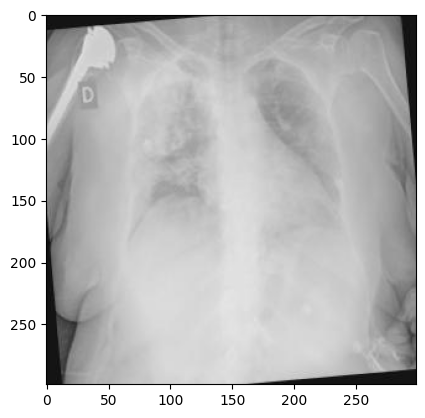

In [22]:
# <=3615 Covid

# >=3616 but < 9628 = Lung_Opacity

# >=9628 but < 19820 = Normal

# >=19820 Viral Pneumonia
#Showing a sample X ray image


import matplotlib.pyplot as plt
import cv2

# Assuming df['filename'][36] contains the filename of the image
image_path = 'drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/COVID/' + df['filename'][10691]

# Read the image in RGB format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()


In [23]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((32992,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)


In [24]:
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/COVID/'+image_file)
    i+=1

In [25]:
for image_file in df2['filename']:
    X[i,:] = resize_img('drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Lung_Opacity/'+image_file)
    i+=1

In [28]:
i=16704

In [29]:
for image_file in df3['filename']:
    X[i,:] = resize_img('drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Normal/'+image_file)
    i+=1

In [30]:
for image_file in df4['filename']:
    X[i,:] = resize_img('drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Viral Pneumonia/'+image_file)
    i+=1

In [31]:
for image_file in df5['filename']:
    X[i,:] = resize_img('drive/Othercomputers/My Laptop/New_COVID-TB-Dataset/Tuberculosis/'+image_file)
    i+=1

In [32]:
X.shape

(32992, 80, 80, 3)

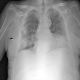

In [33]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [34]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23094, 80, 80, 3)
y_train shape: (23094,)
X_validation shape: (4949, 80, 80, 3)
y_validation shape: (4949,)
X_test shape: (4949, 80, 80, 3)
y_test shape: (4949,)


In [35]:
type(y_test)

pandas.core.series.Series

In [36]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    1604
2    1529
1     902
3     602
4     312
Name: category, dtype: int64
Count of 0: 1604
Count of 1: 902


In [37]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    1604
2    1529
1     902
3     602
4     312
Name: category, dtype: int64
Count of 0: 1604
Count of 1: 902


In [38]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    7484
2    7134
1    4208
3    2810
4    1458
Name: category, dtype: int64
Count of 0: 7484
Count of 1: 4208


In [39]:
# Convert from numpy data to tf.data.Dataset
ds_train = tf.data.Dataset.from_tensor_slices( (X_train, y_train) )
ds_valid = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [40]:
ds_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(80, 80, 3), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [41]:
# Build transformation pipeline for numpy Datasets
def preprocess(image, label):
  #image = tf.expand_dims(image, axis=2) # use tf method
          # note that we don't have the first dimension (# of images) as this
          # function is receiving one Dataset element at a time
          # so use axis number one less than np
          # could use axis=-1 and tf adds at end
  #image = tf.image.grayscale_to_rgb(image)
  image = tf.image.resize(image, [224, 224])
  return (image, label)

ds_train = ds_train.map(preprocess).batch(32).prefetch(1)
ds_valid = ds_valid.map(preprocess).batch(32).prefetch(1)
ds_test = ds_test.map(preprocess).batch(32).prefetch(1)

In [42]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [43]:
import keras

# Use EfficientNet V2
base_model_3X = keras.applications.EfficientNetV2B1(weights="imagenet",
                                                   include_top=False,
                                                   input_shape=(224, 224, 3))

global_avg = keras.layers.GlobalAveragePooling2D()(base_model_3X.output)
dense1 = keras.layers.Dense(1024, activation="relu")(global_avg)
dense2 = keras.layers.Dense(512, activation="relu")(dense1)
dropout = keras.layers.Dropout(0.05)(dense2)

output = keras.layers.Dense(5,activation="softmax")(dropout)

model_3X = keras.models.Model(inputs=base_model_3X.input, outputs=output)


28456008/28456008 [==============================] - 2s 0us/step


In [44]:
# Freeze transferred layers and train
%%time
for layer in base_model_3X.layers:
    layer.trainable = False

model_3X.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history_3X = model_3X.fit(ds_train,
                    epochs=50, validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
722/722 [==============================] - 77s 80ms/step - loss: 0.3940 - accuracy: 0.8571 - val_loss: 0.2503 - val_accuracy: 0.9036
Epoch 2/50
722/722 [==============================] - 55s 76ms/step - loss: 0.2760 - accuracy: 0.9010 - val_loss: 0.2360 - val_accuracy: 0.9127
Epoch 3/50
722/722 [==============================] - 55s 77ms/step - loss: 0.2393 - accuracy: 0.9129 - val_loss: 0.2217 - val_accuracy: 0.9155
Epoch 4/50
722/722 [==============================] - 55s 77ms/step - loss: 0.2186 - accuracy: 0.9203 - val_loss: 0.2151 - val_accuracy: 0.9226
Epoch 5/50
722/722 [==============================] - 56s 77ms/step - loss: 0.2002 - accuracy: 0.9265 - val_loss: 0.2144 - val_accuracy: 0.9190
Epoch 6/50
722/722 [==============================] - 55s 77ms/step - loss: 0.1911 - accuracy: 0.9286 - val_loss: 0.2227 - val_accuracy: 0.9168
Epoch 7/50
722/722 [==============================] - 55s 77ms/step - loss: 0.1813 - accuracy: 0.9330 - val_loss: 0.2164 - val_accuracy:

In [45]:
# Unfreeze layers and train
%%time
for layer in base_model_3X.layers:
    layer.trainable = True

model_3X.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
history_3X = model_3X.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
722/722 [==============================] - 295s 295ms/step - loss: 0.6340 - accuracy: 0.8452 - val_loss: 0.2289 - val_accuracy: 0.9248
Epoch 2/100
722/722 [==============================] - 211s 292ms/step - loss: 0.1811 - accuracy: 0.9328 - val_loss: 0.1761 - val_accuracy: 0.9420
Epoch 3/100
722/722 [==============================] - 211s 292ms/step - loss: 0.1234 - accuracy: 0.9563 - val_loss: 0.1574 - val_accuracy: 0.9515
Epoch 4/100
722/722 [==============================] - 211s 292ms/step - loss: 0.0897 - accuracy: 0.9664 - val_loss: 0.1572 - val_accuracy: 0.9517
Epoch 5/100
722/722 [==============================] - 211s 293ms/step - loss: 0.0676 - accuracy: 0.9755 - val_loss: 0.1567 - val_accuracy: 0.9539
Epoch 6/100
722/722 [==============================] - 211s 292ms/step - loss: 0.0519 - accuracy: 0.9812 - val_loss: 0.1558 - val_accuracy: 0.9572
Epoch 7/100
722/722 [==============================] - 211s 292ms/step - loss: 0.0505 - accuracy: 0.9828 - val_loss: 0

In [46]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model_3X.evaluate(ds_valid)
print(f"Validation Accuracy: {val_accuracy:.4f}")

155/155 [==============================] - 9s 58ms/step - loss: 0.1557 - accuracy: 0.9592
Validation Accuracy: 0.9592


In [47]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_3X.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

155/155 [==============================] - 9s 58ms/step - loss: 0.1633 - accuracy: 0.9582
Test Accuracy: 0.9582


In [48]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_3X = history_3X.history["accuracy"]
val_accuracy_values_3X = history_3X.history["val_accuracy"]

In [49]:
!pip install scikit-image


155/155 [==============================] - 9s 55ms/step


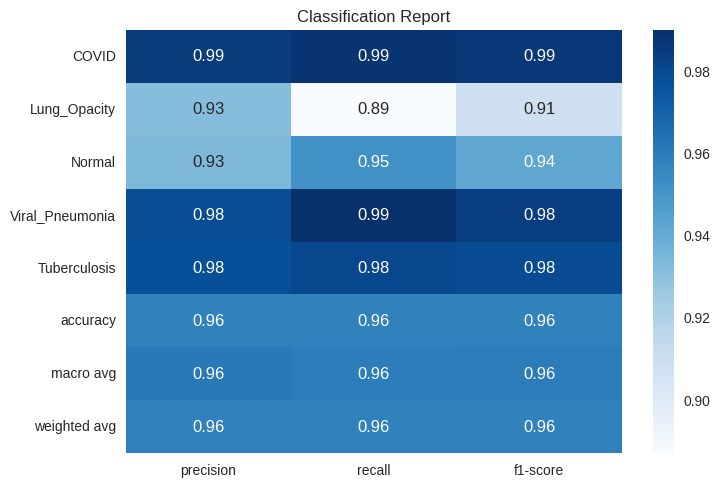

Classification Report:
                  precision    recall  f1-score   support

          COVID       0.99      0.99      0.99      1604
   Lung_Opacity       0.93      0.89      0.91       902
         Normal       0.93      0.95      0.94      1529
Viral_Pneumonia       0.98      0.99      0.98       602
   Tuberculosis       0.98      0.98      0.98       312

       accuracy                           0.96      4949
      macro avg       0.96      0.96      0.96      4949
   weighted avg       0.96      0.96      0.96      4949

Confusion Matrix:
 [[1585    5    7    3    4]
 [   9  800   93    0    0]
 [   8   54 1455    9    3]
 [   2    0    4  596    0]
 [   5    0    0    1  306]]

Metrics for COVID:
  Precision: 0.9851
  Recall: 0.9882
  F1-Score: 0.9866

Metrics for Lung_Opacity:
  Precision: 0.9313
  Recall: 0.8869
  F1-Score: 0.9086

Metrics for Normal:
  Precision: 0.9333
  Recall: 0.9516
  F1-Score: 0.9424

Metrics for Viral_Pneumonia:
  Precision: 0.9787
  Recall: 0.99

<Figure size 1000x600 with 0 Axes>

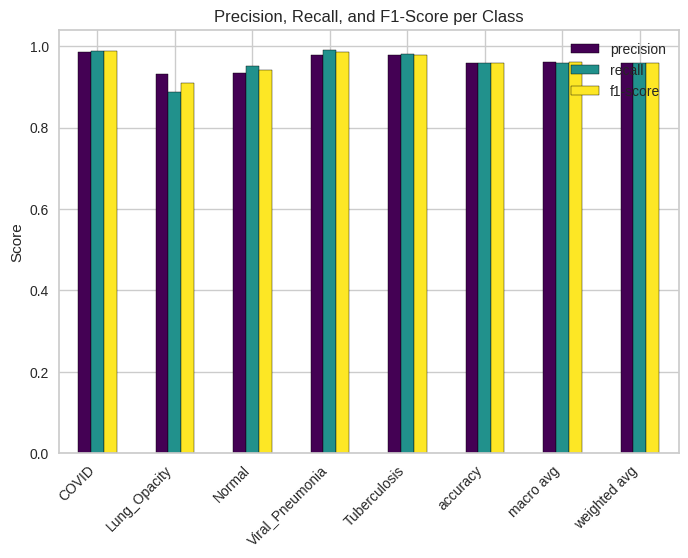

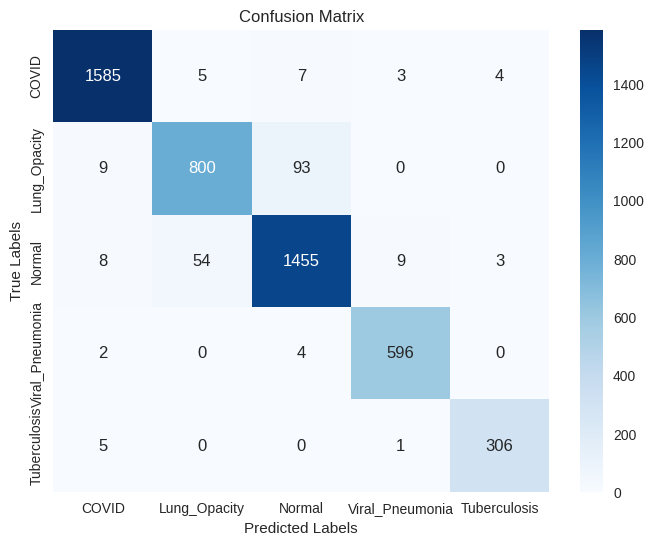

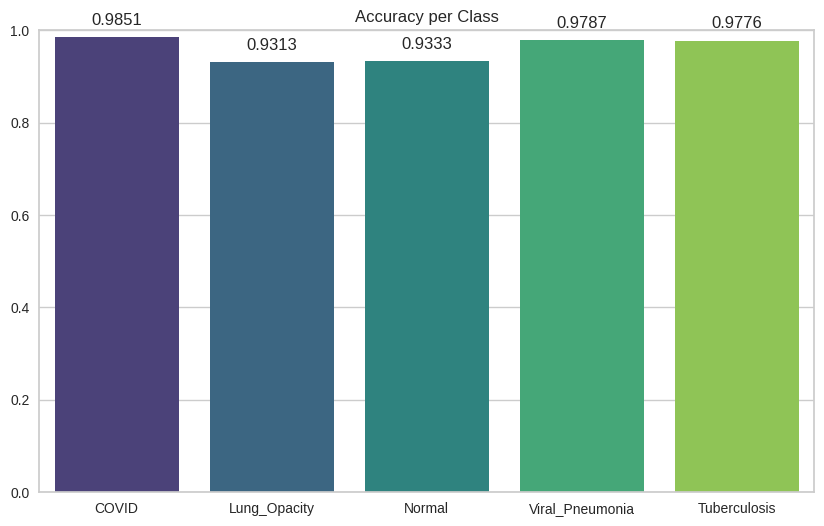


Overall Accuracy: 0.9582


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the resized test set
y_pred = model_3X.predict(ds_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)
# Display classification report with a heatmap
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia', 'Tuberculosis'], output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.show()

# Display classification report
report = classification_report(y_test_np, y_pred_classes, target_names=class_labels, output_dict=True)
print("Classification Report:\n", classification_report(y_test_np, y_pred_classes, target_names=class_labels))

# Display confusion matrix
cm = confusion_matrix(y_test_np, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate accuracy, precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, y_pred_classes, average=None)

# Display metrics for each class
for i, label in enumerate(class_labels):
    print(f"\nMetrics for {label}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")

# Calculate and display overall accuracy
overall_accuracy = accuracy_score(y_test_np, y_pred_classes)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Visualize precision, recall, and F1-score in a chart
metrics_df = pd.DataFrame(report).transpose()
metrics_df.drop('support', axis=1, inplace=True)

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', cmap='viridis', edgecolor='black')
plt.title("Precision, Recall, and F1-Score per Class")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=class_labels, y=precision, palette="viridis")
plt.title("Accuracy per Class")
plt.ylim(0, 1)  # Set y-axis limit to represent precision as a percentage

# Display precision values on the bars
for i, value in enumerate(precision):
    barplot.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.show()
# Display overall accuracy
overall_accuracy = accuracy_score(y_test_np, y_pred_classes)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")